In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Display all the columns of the dataframes
pd.pandas.set_option("display.max_columns", None)

In [5]:
dataset = pd.read_csv("Dataset/Housing_Price/train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(dataset.shape)

(1460, 81)


## In Data Analysis we will analyze to find the below stuffs:
1. Missing Values
2. All the numerical values
3. 
4. Catogrical values
6. Relation btw independent and dependent features
7. Correlation

In [6]:
#Missing values
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
#These are Feature with nan values
features_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum()>=1]
features_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<AxesSubplot:>

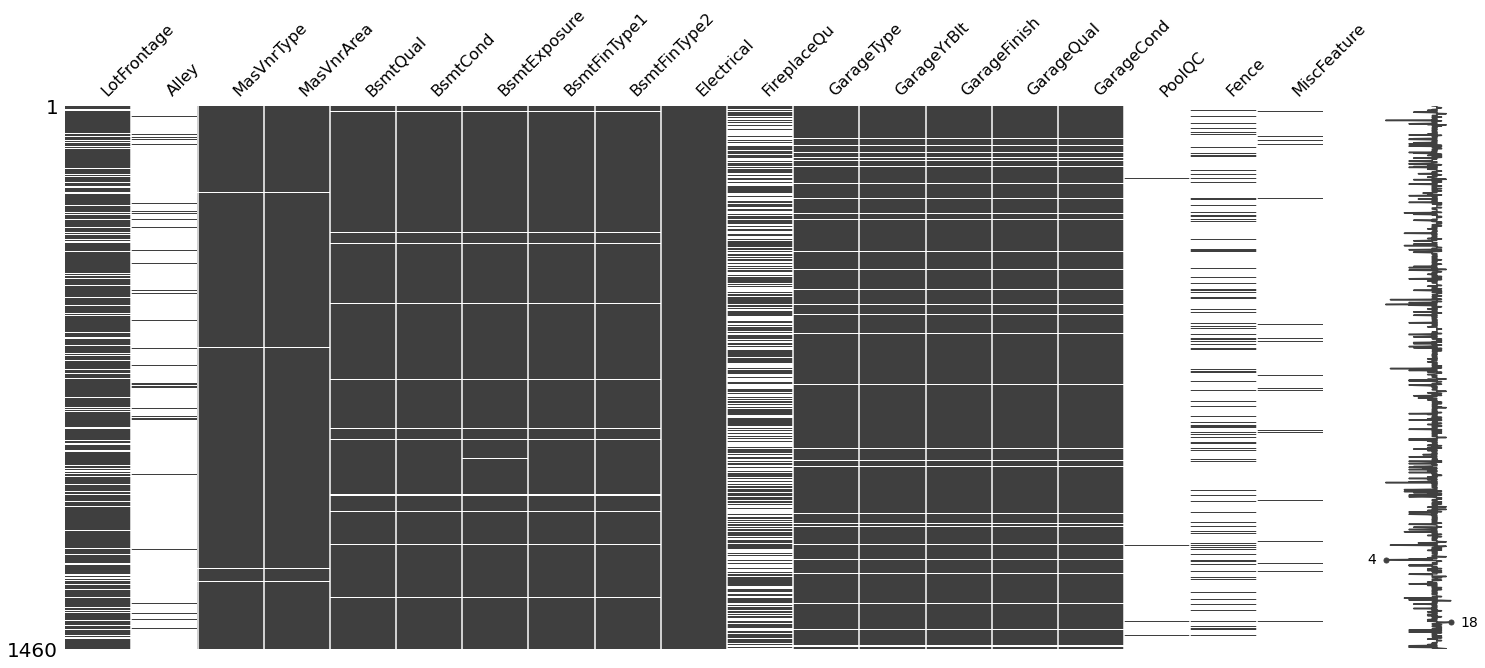

In [26]:
import missingno
missingno.matrix(dataset[features_with_nan])

In [9]:
dataset[features_with_nan].isnull().mean()*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

- Observation:
    1. Alley, PoolQC, Fence, MiscFrature have more then 80% of missing data

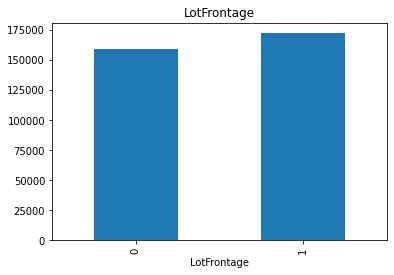

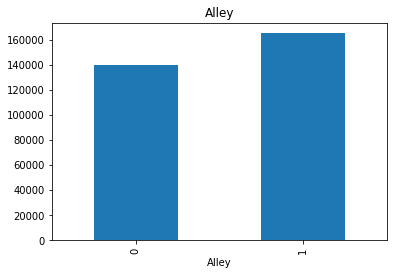

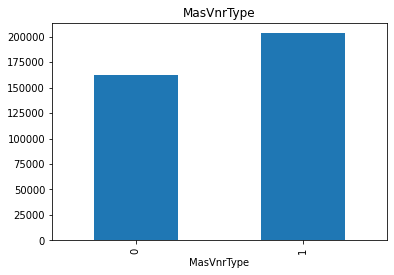

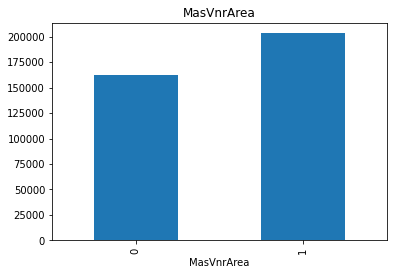

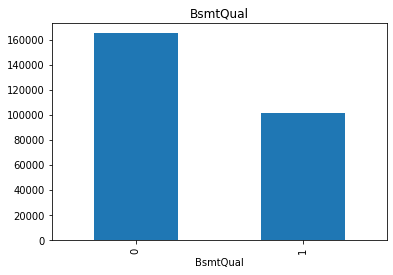

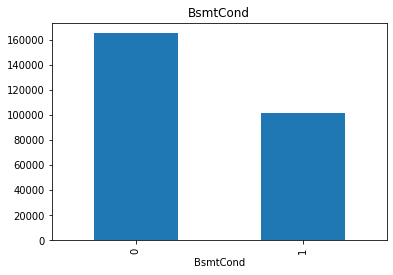

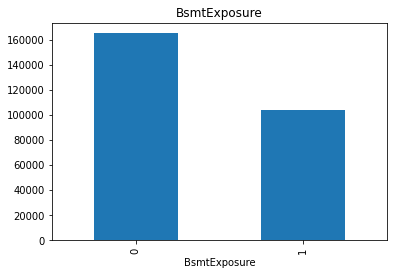

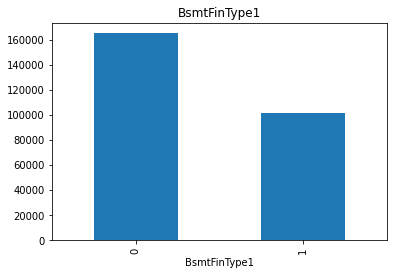

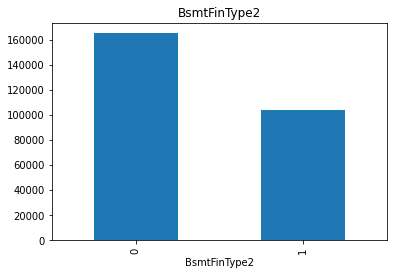

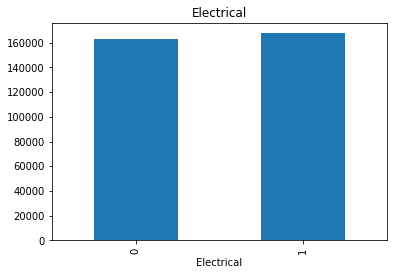

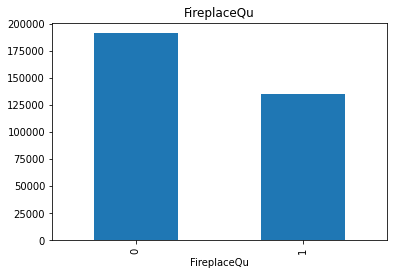

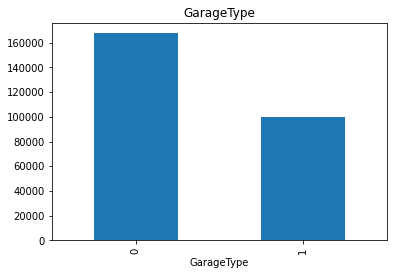

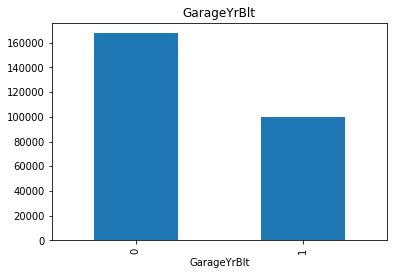

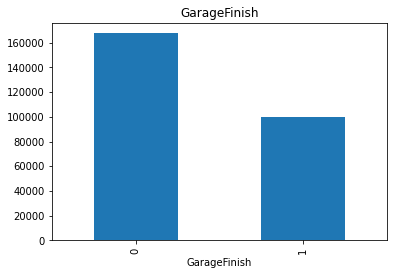

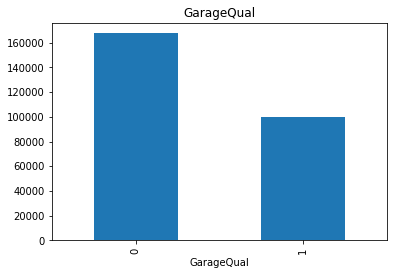

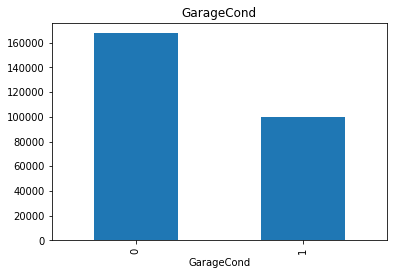

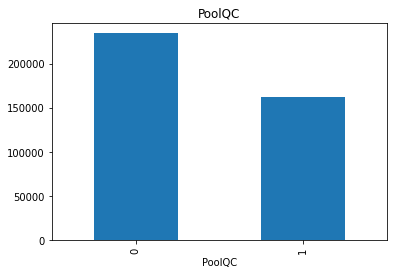

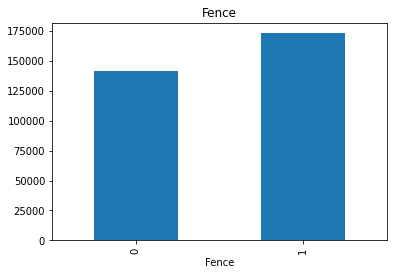

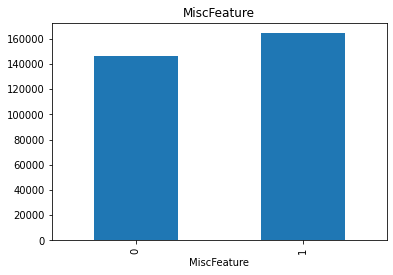

In [18]:
#Plotting Some Amazing Diagrams
for feature in features_with_nan:
    data = dataset.copy()
    #Make a vairable that indicate 1 if data is missing and 0 if not
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

There is some relation between Missing data and SalePrice so substuting value with some sutible values is required

# Nuerical Varibles

In [21]:
## List of Numerical Varible
numerical_feature =[feature for feature in dataset.columns if dataset[feature].dtype != "O"]

In [22]:
print(len(numerical_feature))
dataset[numerical_feature].sample(5)

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
820,821,60,72.0,7226,7,5,2003,2003,0.0,0,0,798,798,798,842,0,1640,0,0,2,1,3,1,6,0,2003.0,2,595,0,45,0,0,0,0,0,6,2008,183000
166,167,20,NaN,10708,5,5,1955,1993,0.0,379,768,470,1617,1867,0,0,1867,1,0,1,0,2,1,7,3,1955.0,1,303,476,0,0,0,142,0,0,11,2009,190000
309,310,20,90.0,12378,9,5,2003,2004,0.0,1274,0,622,1896,1944,0,0,1944,1,0,2,0,3,1,8,3,2003.0,3,708,208,175,0,0,0,0,0,11,2006,360000
793,794,20,76.0,9158,8,5,2007,2007,140.0,0,0,1496,1496,1496,0,0,1496,0,0,2,0,3,1,7,0,2007.0,2,474,168,130,0,0,0,0,0,6,2007,225000
1105,1106,60,98.0,12256,8,5,1994,1995,362.0,1032,0,431,1463,1500,1122,0,2622,1,0,2,1,3,1,9,2,1994.0,2,712,186,32,0,0,0,0,0,4,2010,325000


In [28]:
# Temporial Variables(datetime variables):
year_feature = [feature for feature in numerical_feature if 'Yr' in feature or "Year" in feature]

In [30]:
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Prise vs Year sold')

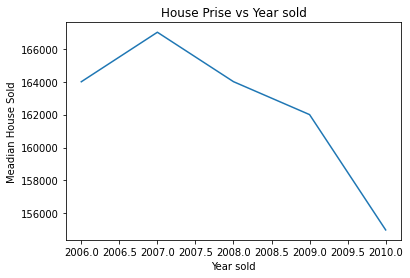

In [32]:
dataset.groupby("YrSold")['SalePrice'].median().plot()
plt.xlabel("Year sold")
plt.ylabel("Meadian House Sold")
plt.title("House Prise vs Year sold")

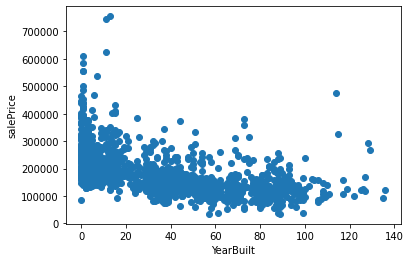

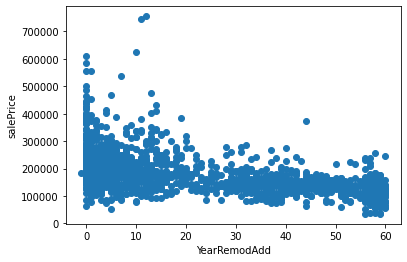

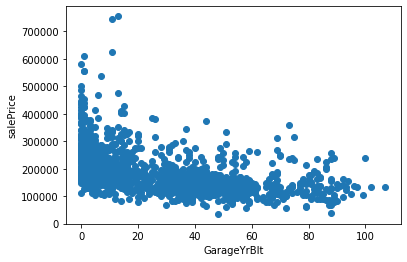

In [36]:
# We will compare the difference btw all year features with SalesPrice
data = dataset.copy()
for feature in year_feature:
    if feature != "YrSold":
        data[feature] = data["YrSold"] - data[feature]
        
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("salePrice")
        plt.show()

- Observation :
    1. With increase in Age of house The Price value is also reduce

In [38]:
#Numerical VAriables
# COntinues  variables and Discreate variable

discreate_feature = [feature for feature in numerical_feature if len(dataset[feature].unique())<=25]
print(len(discreate_feature))

18


In [40]:
dataset[discreate_feature].sample(5)

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
693,30,5,6,0,0,0,1,0,2,1,4,0,1,0,0,0,12,2006
463,70,6,7,0,0,0,1,1,3,1,6,1,1,0,0,0,8,2008
1092,50,6,5,0,0,0,2,0,4,1,7,1,2,0,0,0,6,2008
1138,20,6,5,0,1,0,2,0,2,1,5,2,2,0,0,0,5,2009
865,20,5,6,0,1,0,1,0,3,1,5,0,2,0,0,0,8,2009


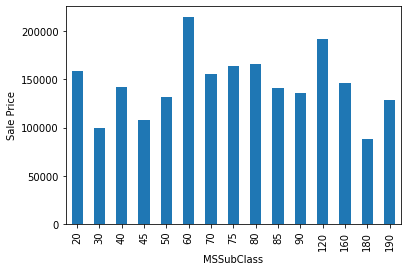

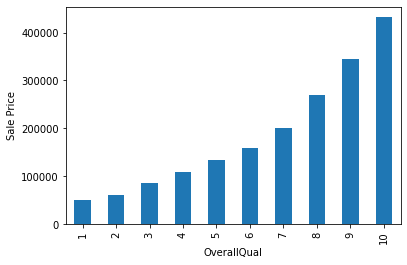

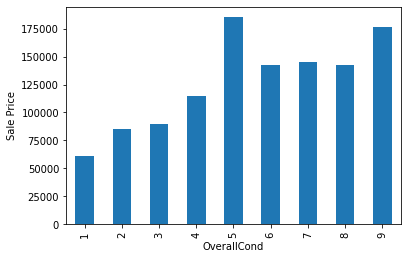

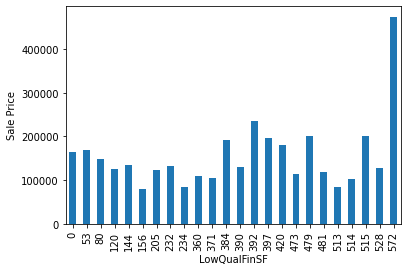

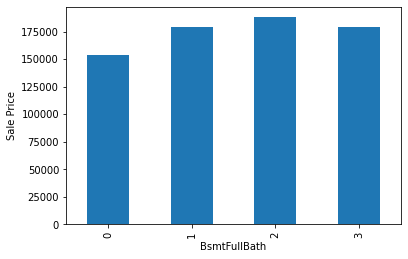

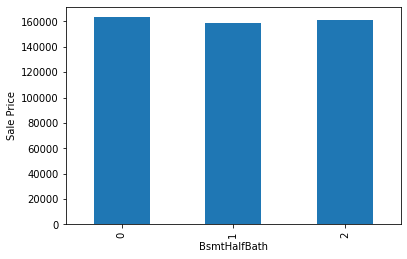

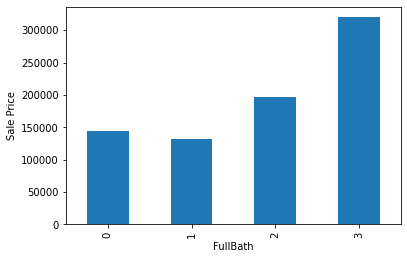

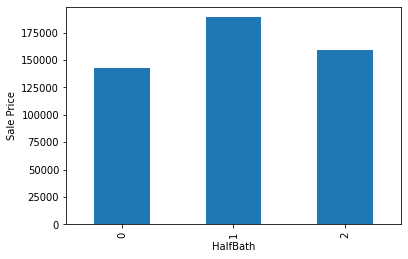

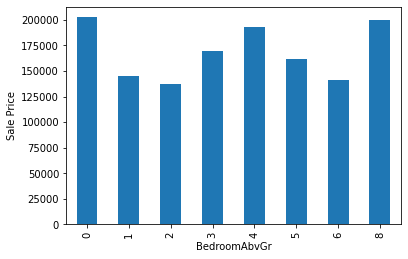

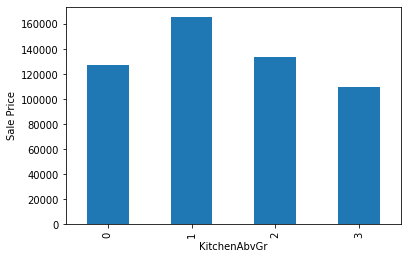

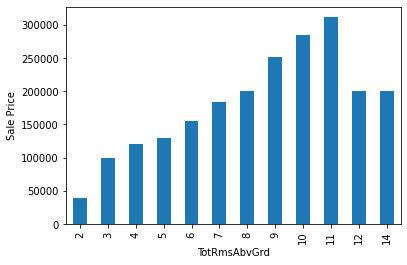

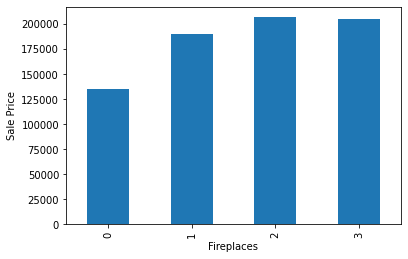

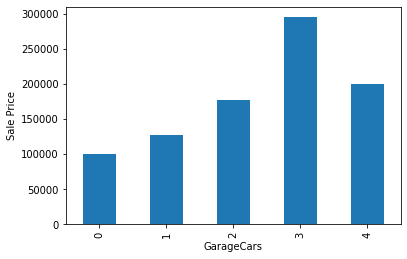

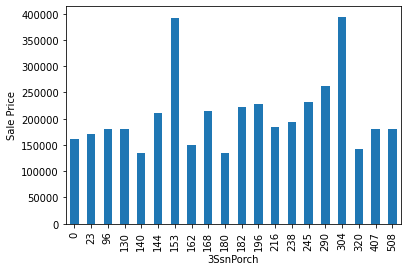

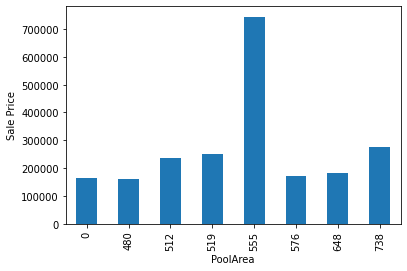

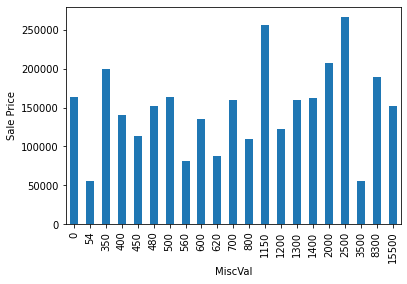

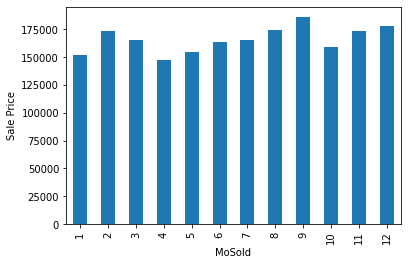

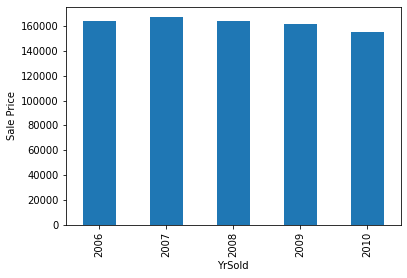

In [43]:
# Lets find the realtion_ship beteen discreate and sales price
data = dataset.copy()
for feature in discreate_feature:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()

- Obseravitions:
    1. There is a realtion between Discreate Feature and SalePrice

In [50]:
# Continues Variable:
continues_feature =[feature for feature in numerical_feature if feature not in discreate_feature + year_feature]
len(continues_feature)

17

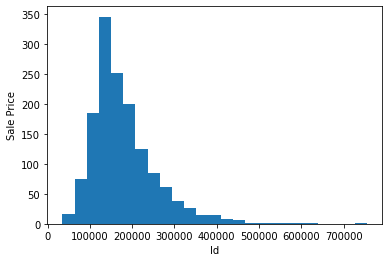

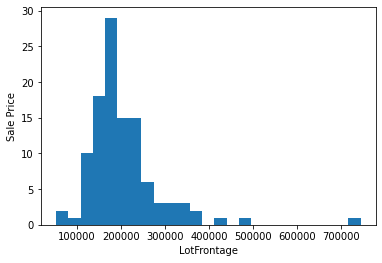

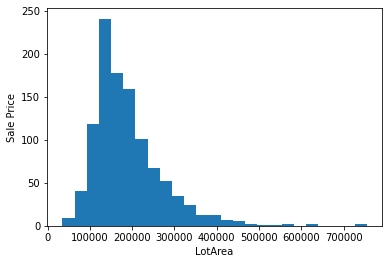

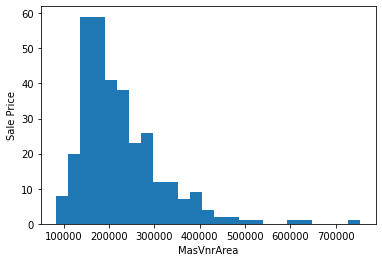

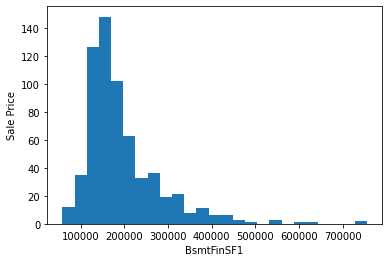

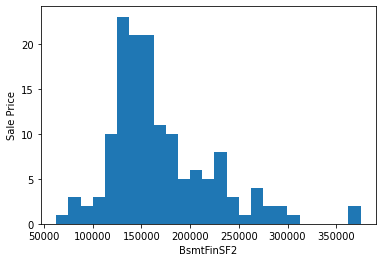

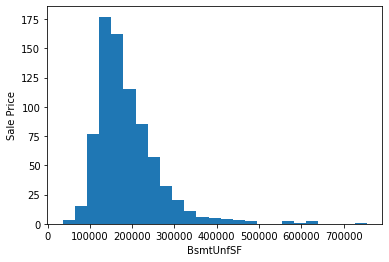

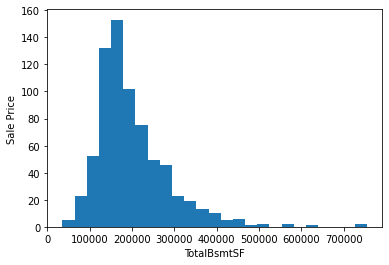

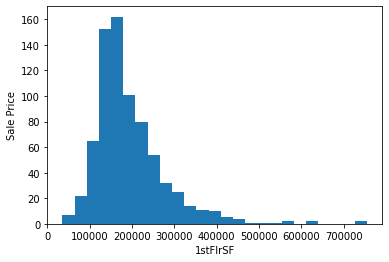

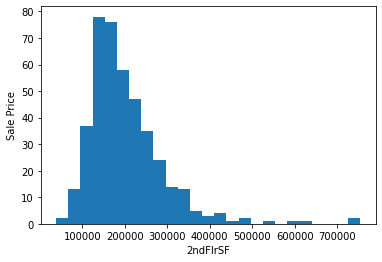

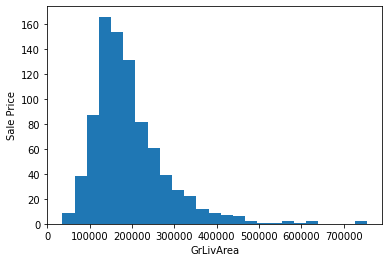

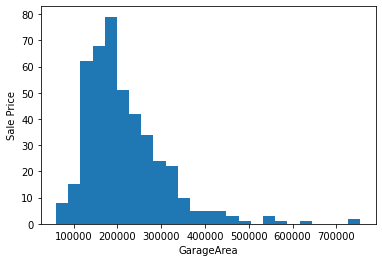

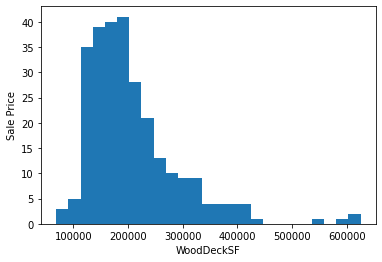

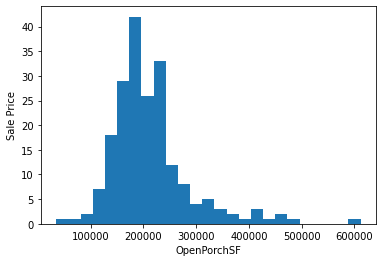

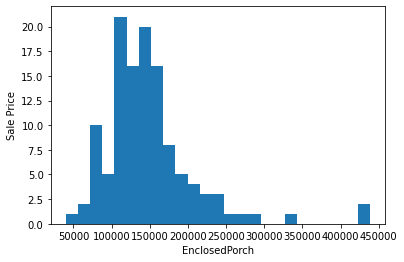

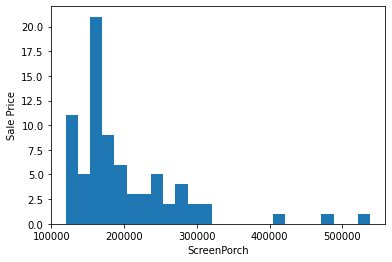

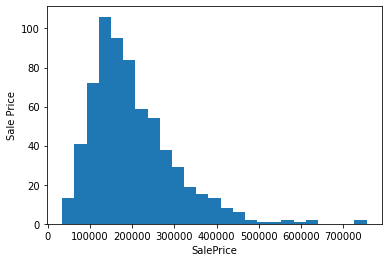

In [52]:
## analysig the continues values by creating histogram
data = dataset.copy()
for feature in continues_feature:
    data.groupby(feature)['SalePrice'].median().plot.hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()

## EDA 2

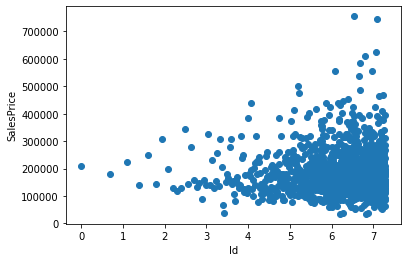

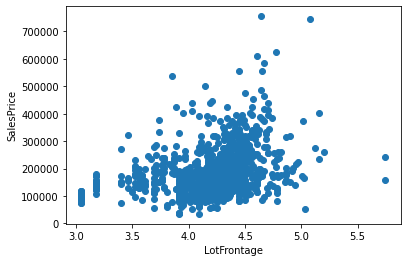

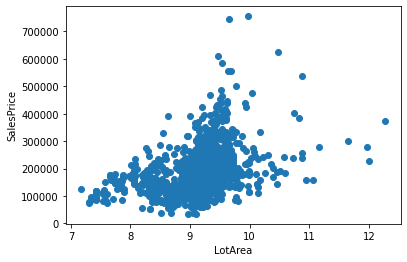

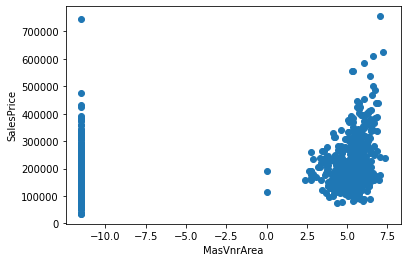

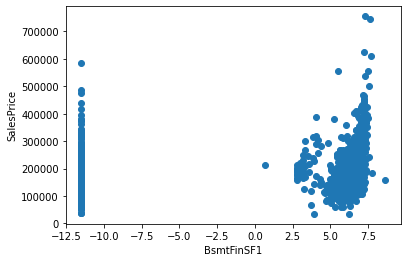

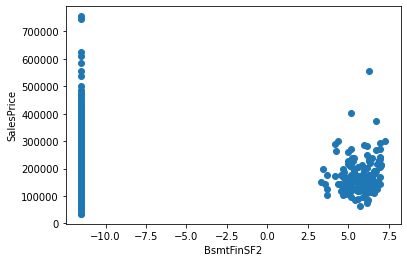

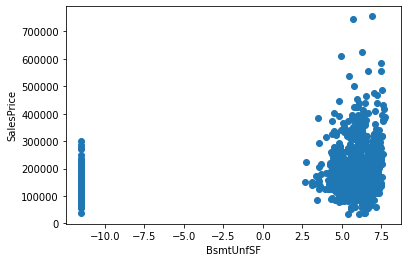

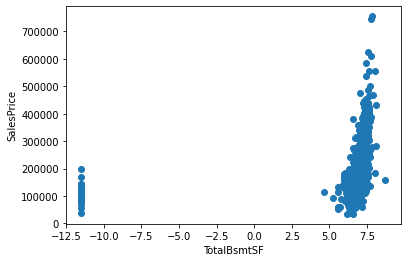

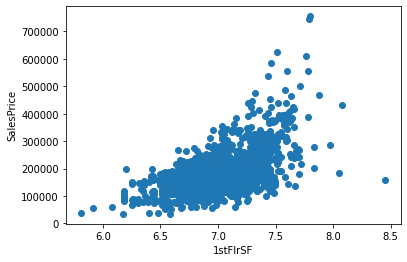

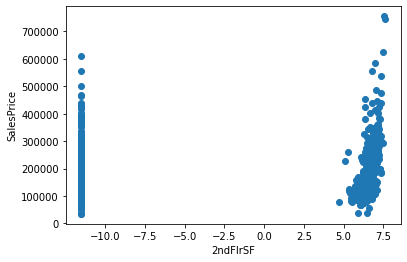

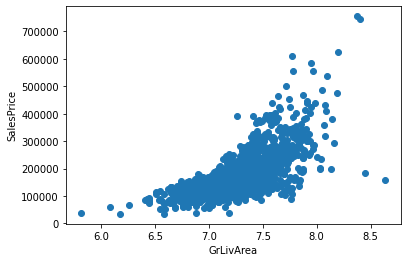

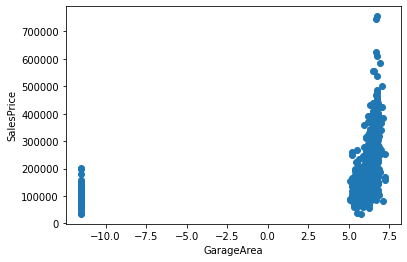

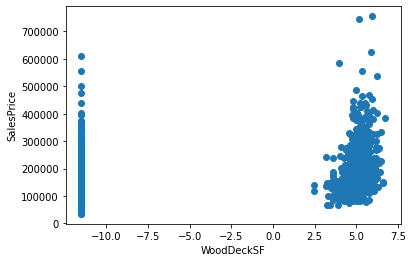

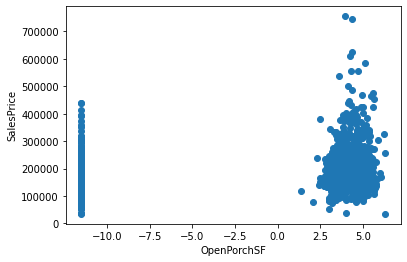

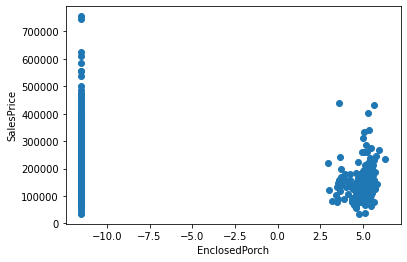

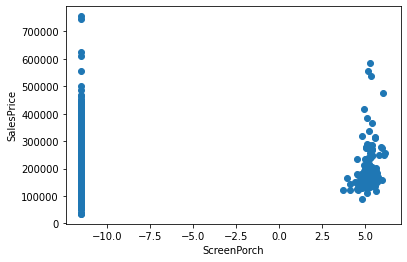

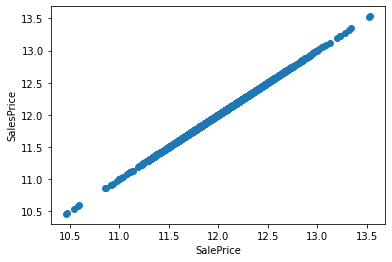

In [56]:
# we will beusing logarthemic Transformation:
data = dataset.copy()
for feature in continues_feature:
    data[feature] = data[feature] + 0.00001
    data[feature] = np.log(data[feature])
    plt.scatter(data[feature], data["SalePrice"])
    plt.xlabel(feature)
    plt.ylabel("SalesPrice")
    plt.show()

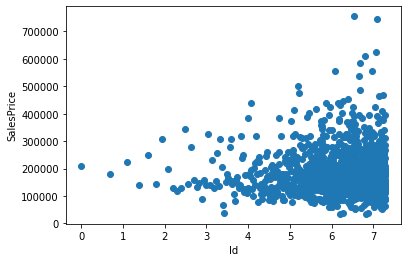

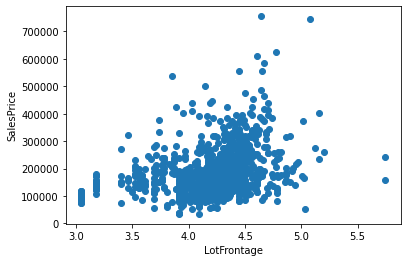

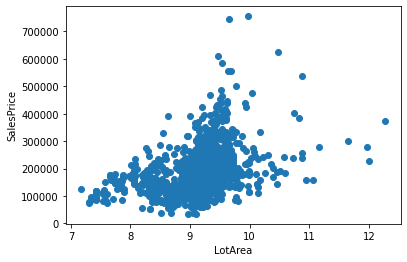

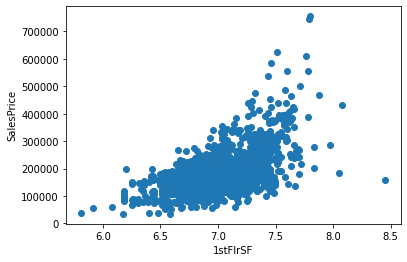

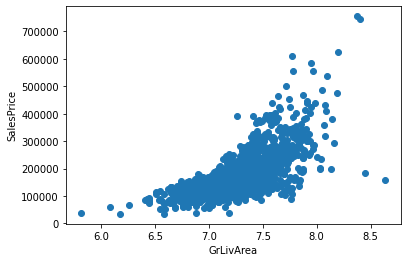

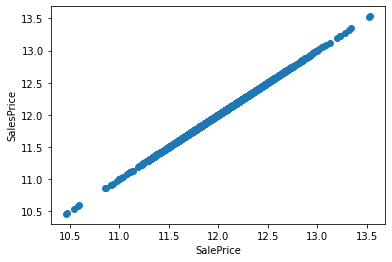

In [57]:
# we will beusing logarthemic Transformation:
data = dataset.copy()
for feature in continues_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalesPrice")
        plt.show()

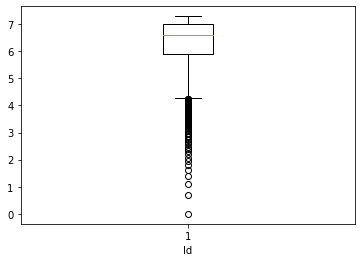

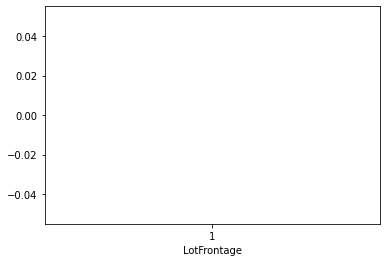

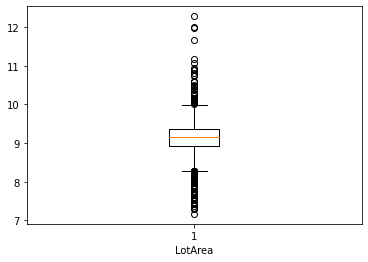

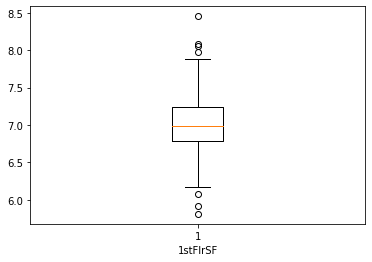

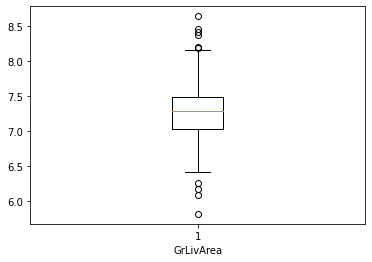

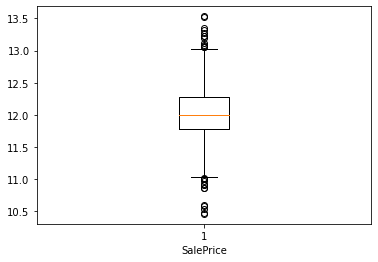

In [67]:
## Outliers:
for feature in continues_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        plt.boxplot(data[feature])
        plt.xlabel(feature)
        plt.show()

## Categorical Variables

In [60]:
categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

In [61]:
dataset[categorical_feature].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
1027,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,New,Partial
1228,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,Ex,TA,PConc,Ex,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
1167,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
876,RL,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,Plywood,None,TA,TA,PConc,TA,TA,Gd,ALQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [65]:
for feature in categorical_feature:
    print("The feature name is {} and the number of categories are {}".format(feature, len(dataset[feature].unique())))

The feature name is MSZoning and the number of categories are 5
The feature name is Street and the number of categories are 2
The feature name is Alley and the number of categories are 3
The feature name is LotShape and the number of categories are 4
The feature name is LandContour and the number of categories are 4
The feature name is Utilities and the number of categories are 2
The feature name is LotConfig and the number of categories are 5
The feature name is LandSlope and the number of categories are 3
The feature name is Neighborhood and the number of categories are 25
The feature name is Condition1 and the number of categories are 9
The feature name is Condition2 and the number of categories are 8
The feature name is BldgType and the number of categories are 5
The feature name is HouseStyle and the number of categories are 8
The feature name is RoofStyle and the number of categories are 6
The feature name is RoofMatl and the number of categories are 8
The feature name is Exterio

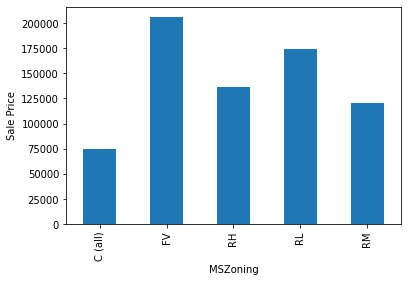

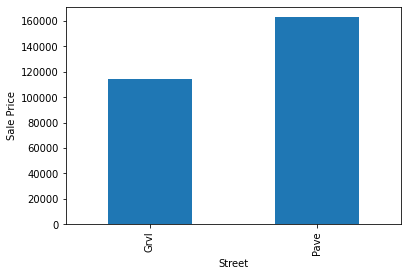

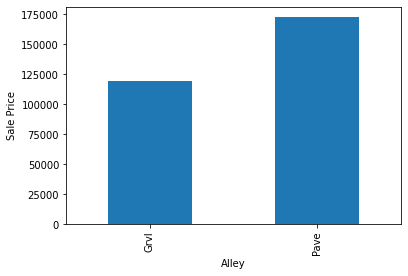

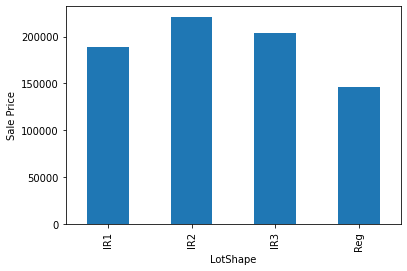

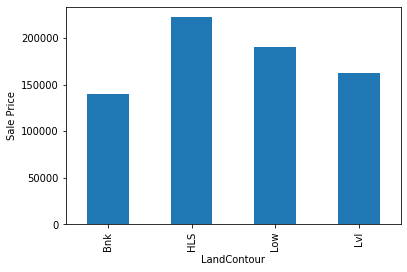

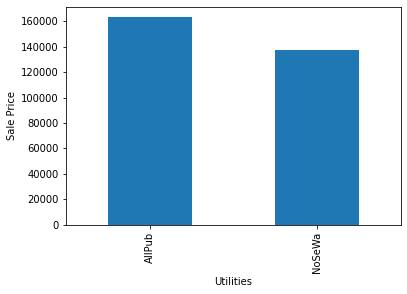

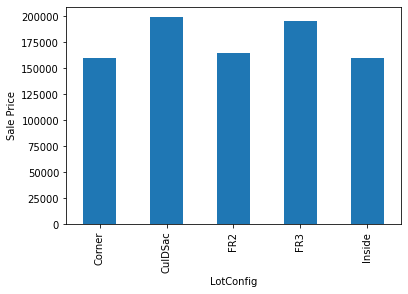

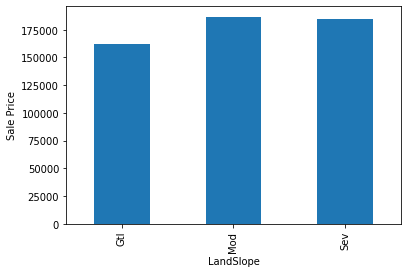

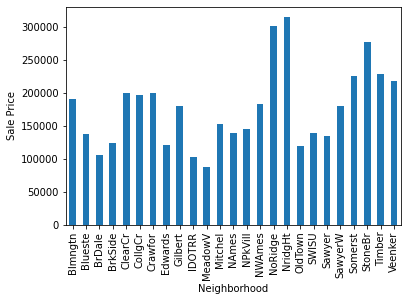

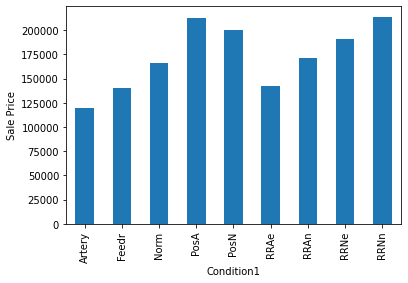

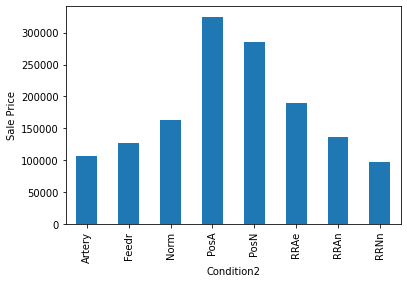

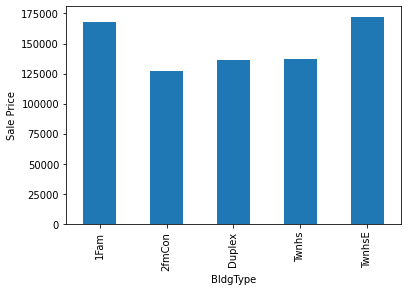

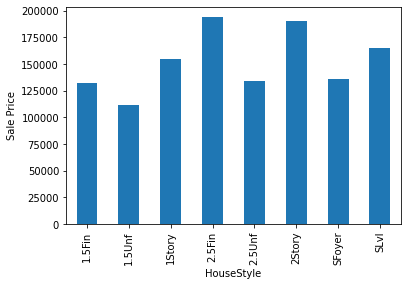

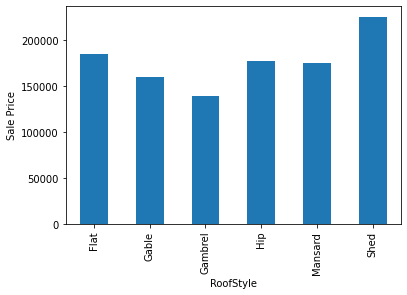

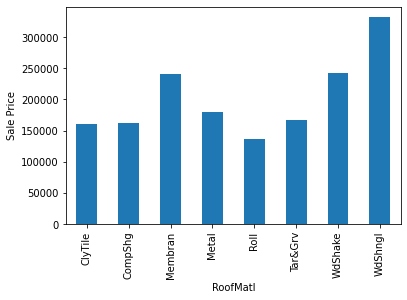

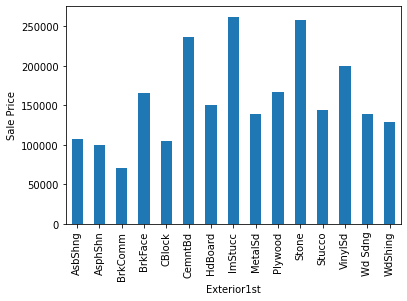

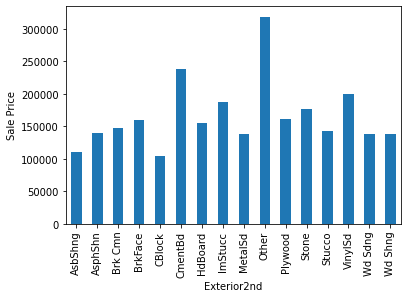

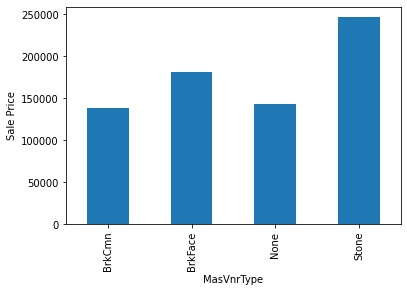

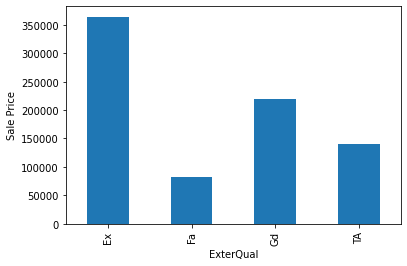

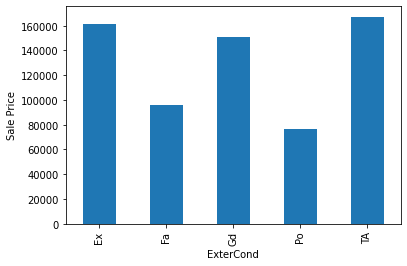

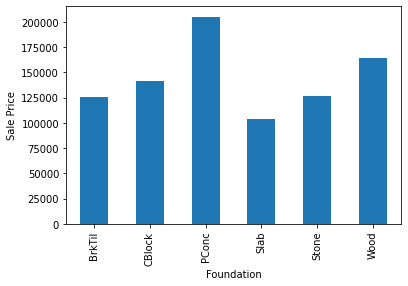

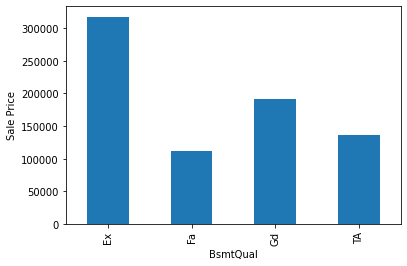

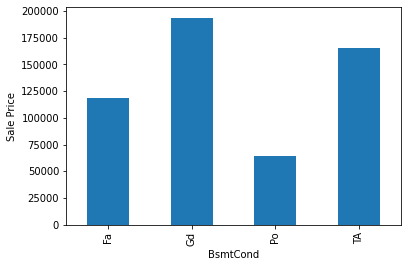

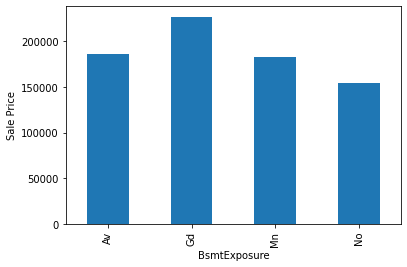

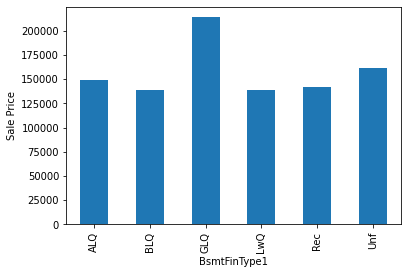

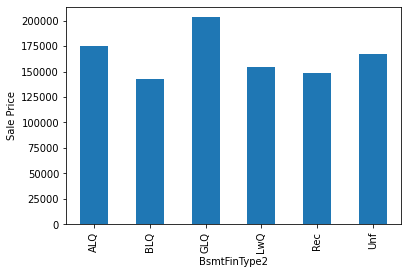

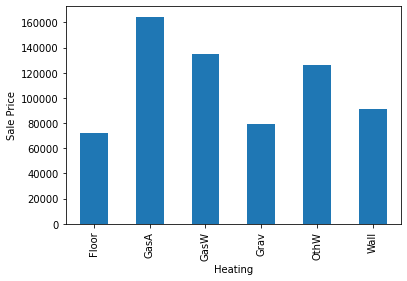

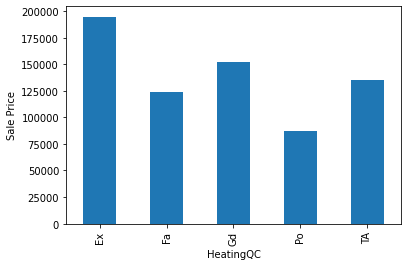

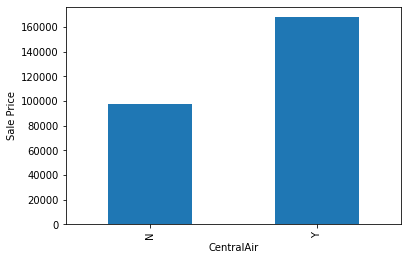

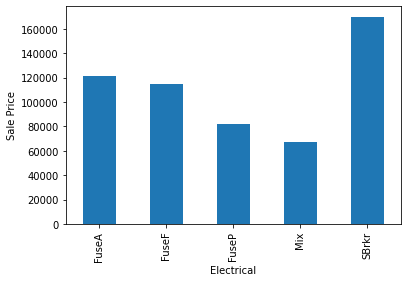

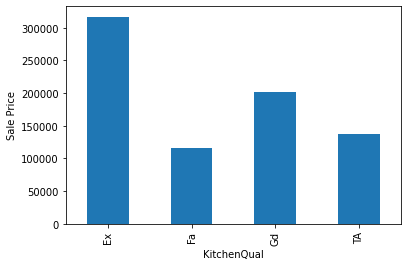

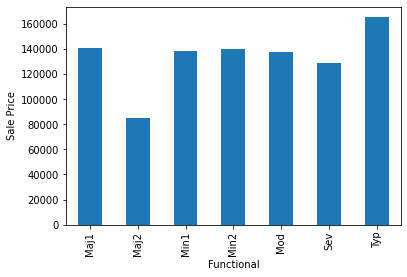

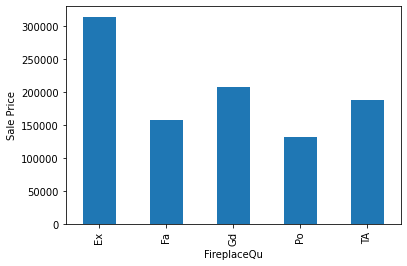

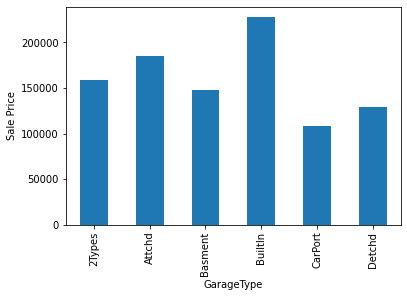

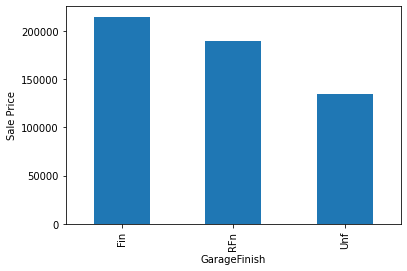

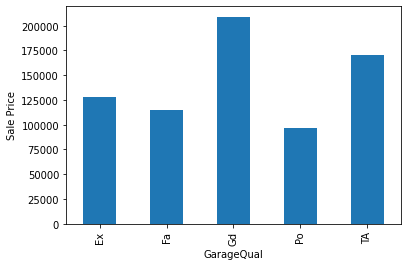

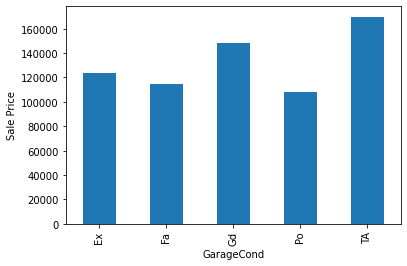

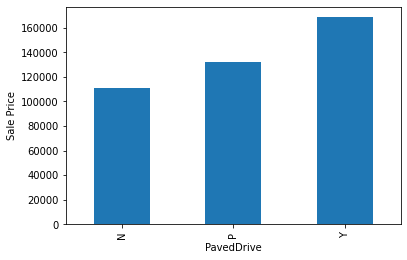

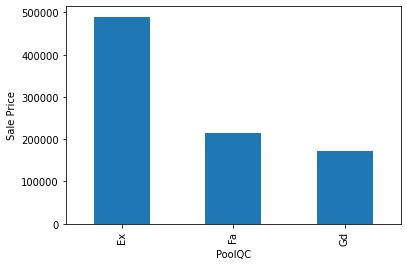

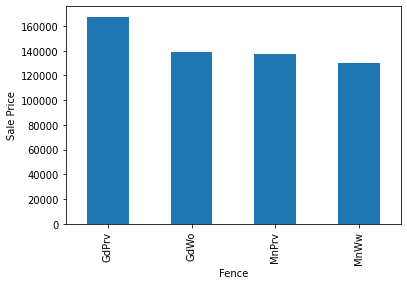

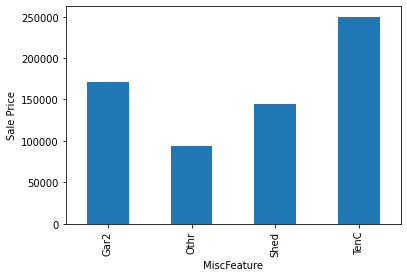

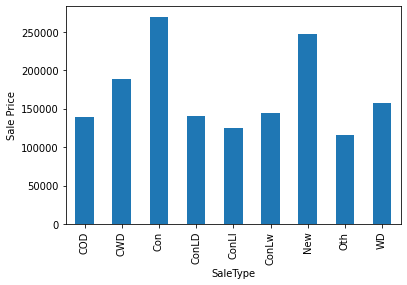

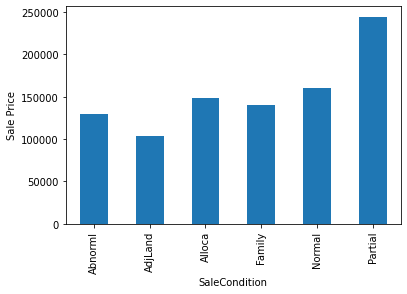

In [66]:
# Find the relationship between categorical feature and saleprice
data = dataset.copy()
for feature in categorical_feature:
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()